##gender_age_train  named as cust
columns
#device_id 	gender 	age 	group
No of records #74645  

#phone_brand_device_model named as brand
#device_id 	phone_brand 	device_model
#87726 entries
#event_id 	device_id 	timestamp 	longitude 	latitude 	city 	state 


After merging all 3 datasets
missing values as follows
event_id          0
device_id       453
timestamp         0
longitude       423
latitude        423
city              0
state           377
gender          453
age             453
group           453
phone_brand     453
device_model    453


#1002178 entries
#TamilNadu, Manipur, Chandigarh, Tripura, UttarPradesh, ArunachalPradesh 

Index: 164924 entries
    
#1000 unique device ids
#1000 unique events

##city has 0 missing
##state has some missing fill state from city
##lat long should be filled with mode of city of lat long
#device id to be filled with nearest neighbors as of lat long
#age gender agegroup can be filled with mode

In [2]:
#pip install mysql-connector-python
import pandas as pd
import numpy as np
import mysql.connector
#from mysql.connector import Error

In [2]:
connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone1',
                                         user='student',
                                         password='student')
sql_select_Query = "select * from information_schema.columns where table_name = 'gender_age_train'"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Total number of rows in gender_age_train is: ", cursor.rowcount)
print("\nPrinting column Names of table gender_age_train ")
for row in records:
    print("Table_Name = ", row[2], )
    print("Column Name  = ", row[3], "\n")
    
print('---------------------------------------------------------------------------------------------------------')
sql_select_Query = "select * from gender_age_train"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("\n Storing records from gender_age_train to dataframe")

gender_age_train_df = pd.DataFrame(records)

Total number of rows in gender_age_train is:  4

Printing column Names of table gender_age_train 
Table_Name =  gender_age_train
Column Name  =  device_id 

Table_Name =  gender_age_train
Column Name  =  gender 

Table_Name =  gender_age_train
Column Name  =  age 

Table_Name =  gender_age_train
Column Name  =  group 

---------------------------------------------------------------------------------------------------------

 Storing records from gender_age_train to dataframe


In [3]:
cust = gender_age_train_df.rename(columns={0:'device_id',1:'gender',2:'age',3:'group'})
cust.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [4]:

cust.info()
cust.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [5]:
sql_select_Query = "select * from information_schema.columns where table_name = 'phone_brand_device_model'"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Total number of rows in phone_brand_device_model is: ", cursor.rowcount)
print("\nPrinting column Names of table phone_brand_device_model ")
for row in records:
    print("Table_Name = ", row[2], )
    print("Column Name  = ", row[3], "\n")
    
print('---------------------------------------------------------------------------------------------------------')
sql_select_Query = "select * from phone_brand_device_model"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("\n Storing records from phone_brand_device_model to dataframe")

phone_brand_device_model_df = pd.DataFrame(records)


Total number of rows in phone_brand_device_model is:  3

Printing column Names of table phone_brand_device_model 
Table_Name =  phone_brand_device_model
Column Name  =  device_id 

Table_Name =  phone_brand_device_model
Column Name  =  phone_brand 

Table_Name =  phone_brand_device_model
Column Name  =  device_model 

---------------------------------------------------------------------------------------------------------

 Storing records from phone_brand_device_model to dataframe


In [6]:
phone_brand_device_model_df.head()

,0,1,2
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [7]:
brand = phone_brand_device_model_df.rename(columns={0:'device_id',1:'phone_brand',2:'device_model'})

In [12]:
brand.head(100)
#brand.info()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2
...,...,...,...
95,-1448462447603417846,vivo,X5Max+
96,-1095322848316287559,三星,Galaxy J5
97,7159481660763360016,三星,Galaxy Note 4
98,-7551022170420705991,华为,荣耀畅玩4X


In [13]:
cust['device_id'] = cust['device_id'].astype(str)
brand['device_id'] = brand['device_id'].astype(str)

In [14]:
#Events_data_df = pd.read_csv('F:\genfiles\events_data.csv')
#Events_data_df.isnull().sum()
# creating bool series True for NaN values  
#bool_series = pd.isnull(Events_data_df["device_id"])  
    
# filtering data  
# displaying data only with Gender = NaN  
#Events_data_df[bool_series]  

dtype_dic= { 'device_id':str}
Events_data_df = pd.read_csv('F:\genfiles\events_data.csv', dtype = dtype_dic)
#merged1.isnull().sum()
bool_series = pd.isnull(Events_data_df["device_id"])  
    
# filtering data  
# displaying data only with Gender = NaN  
Events_data_df[bool_series]  


,event_id,device_id,timestamp,longitude,latitude,city,state
2055,1936567,NaN,2016-05-02 15:27:54,75.882956,22.814519,Indore,MadhyaPradesh
26367,2659282,NaN,2016-05-04 14:06:24,75.888487,26.948689,Jaipur,Rajasthan
42088,442198,NaN,2016-05-06 09:27:37,75.846007,26.960796,Jaipur,Rajasthan
43061,1903648,NaN,2016-05-02 15:41:54,75.923332,22.777781,Indore,MadhyaPradesh
44823,3227383,NaN,2016-05-05 08:37:09,75.992551,31.561747,Hoshiarpur,Punjab
...,...,...,...,...,...,...,...
3212337,2191286,NaN,2016-05-04 18:16:06,83.357991,17.805195,Visakhapatnam,AndhraPradesh
3215120,572054,NaN,2016-05-07 08:48:22,83.371738,17.752819,Visakhapatnam,AndhraPradesh
3230115,332451,NaN,2016-05-07 09:01:45,75.992551,31.561747,Hoshiarpur,Punjab
3235494,2534073,NaN,2016-05-06 21:07:01,83.371738,17.752819,Visakhapatnam,AndhraPradesh


In [15]:
Events_data_df.head()
Events_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  object 
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 173.7+ MB


#Functionn to impute the column with mode based on particular criteria
#If you are imputing state column which has null values for example city Pune STate Na
#we have 32L records out of which 450 null values in state are there
#we pick the data from city Pune with non null state value and fill the Na value in state with ity pune
#we use mode for the city. Same will apply to other columns

In [34]:
def impute_values(final_df, colrefername,col1,col2):
    df_all=final_df
    boolseries = pd.isnull(df_all[col1])  
    df_na=df_all[boolseries]

    boolseries = pd.notnull(df_all[col1])  
    df_proper=df_all[boolseries]
    #df_na.info()
    #df_proper.info()
    #df_all.info()

    frames=[]
    for colrefer in list(set(df_na[colrefername])):
        #colrefer='83.35799117.805195'
          
        dffilt_all = df_all[df_all[colrefername]== colrefer]
        #print(dffilt_all[col].mode()[0])
        #print(dffilt_all.head(1))
        #print(df_city.isnull().sum())
        dffilt_na = df_na[df_na[colrefername]== colrefer]
        #print(dffilt_na.head(500))
        #dffilt_all.info()
        #dffilt_na.info()
        #print(dffilt_all)
        fillval1 = dffilt_all[col1].mode()[0]
        dffilt_na[col1].fillna(fillval1,inplace = True)
        fillval2=''
        if col2!='':
            fillval2 = dffilt_all[col2].mode()[0]
            dffilt_na[col2].fillna(fillval2,inplace = True)
        #print(df_city.isnull().sum())
        print('columnused:'+colrefername+'>'+str(colrefer)+'>'+'for filling:'+str(col1)+str(col2)+'filled with:'+str(fillval1)+str(fillval2) )
        
        frames.append(dffilt_na)
        df_final = pd.concat(frames)
        #print(dffilt_all.head(500))
        #dffilt_all.info()
        
    frames=[]
    frames.append(df_final)
    frames.append(df_proper)
    final_dfimputed = pd.concat(frames)
    return final_dfimputed


#impute state

In [28]:


final_df = Events_data_df
chkdf = final_df

df_final = pd.DataFrame()
coltoimpute1='state'
colcriteria='city'
df_final = impute_values(final_df, colcriteria,coltoimpute1,'')
#df_narecordstocheck.info()


D:\anaconda\instn\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


columnused:city>Pune>for filling:statefilled with:Maharashtra
columnused:city>Jaipur>for filling:statefilled with:Rajasthan
columnused:city>Delhi>for filling:statefilled with:Delhi
columnused:city>Indore>for filling:statefilled with:MadhyaPradesh
columnused:city>Gangarampur>for filling:statefilled with:WestBengal
columnused:city>Channapatna>for filling:statefilled with:Karnataka
columnused:city>Arambagh>for filling:statefilled with:WestBengal
columnused:city>Chennai>for filling:statefilled with:TamilNadu
columnused:city>Visakhapatnam>for filling:statefilled with:AndhraPradesh


In [25]:
boolseries = pd.isnull(chkdf[coltoimpute1])  
df_narecordstocheck=final_df[boolseries]
#cross check if Nan is filled
mrgcheck = pd.merge(left=df_narecordstocheck, right=df_final, how="inner", left_on='event_id', right_on='event_id')
#mrgcheck.head(1000)
mrgcheck[['device_id_x','city_x','state_x', 'city_y','state_y']].head(100)

,device_id_x,city_x,state_x,city_y,state_y
0,-5829328361235250344,Pune,NaN,Pune,Maharashtra
1,3137053756433768671,Visakhapatnam,NaN,Visakhapatnam,AndhraPradesh
2,-1752057305775059707,Indore,NaN,Indore,MadhyaPradesh
3,-394582654031064105,Visakhapatnam,NaN,Visakhapatnam,AndhraPradesh
4,5536513450525271144,Chennai,NaN,Chennai,TamilNadu
...,...,...,...,...,...
95,1177845145394796843,Jaipur,NaN,Jaipur,Rajasthan
96,-394582654031064105,Visakhapatnam,NaN,Visakhapatnam,AndhraPradesh
97,4620270824872937618,Arambagh,NaN,Arambagh,WestBengal
98,1177845145394796843,Jaipur,NaN,Jaipur,Rajasthan


In [17]:
df_final.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

In [29]:
#impute device_id
final_df=df_final
chkdf=final_df
final_df["latlong"] = final_df["longitude"].astype(str) + final_df["latitude"].astype(str)
coltoimpute1='device_id'
coltoimpute2=''
colcriteria='latlong'
df_final = impute_values(final_df, colcriteria,coltoimpute1,coltoimpute2)
final_df.info()
df_final.isnull().sum()

boolseries = pd.isnull(chkdf[coltoimpute1])  
df_narecordstocheck=final_df[boolseries]
mrgcheck = pd.merge(left=df_narecordstocheck, right=df_final, how="inner", left_on='event_id', right_on='event_id')

mrgcheck[['event_id_x','device_id_x','device_id_y']].head(100)
mrgcheck.head(1000)

columnused:latlong>75.8829560000000222.814519>for filling:device_idfilled with:3132861355949762783
columnused:latlong>73.1693449999999821.194283>for filling:device_idfilled with:-8215770519233685145
columnused:latlong>73.86275618.628057>for filling:device_idfilled with:9027085705222633039
columnused:latlong>83.35799117.805195>for filling:device_idfilled with:6844192269280790123
columnused:latlong>77.2748139999999828.721053>for filling:device_idfilled with:3724654925765159056
columnused:latlong>75.84600726.960796>for filling:device_idfilled with:-8460337302442785825
columnused:latlong>73.8601650000000218.566925>for filling:device_idfilled with:8539870903150472243
columnused:latlong>75.9925509999999831.561746999999997>for filling:device_idfilled with:1750778632182066836
columnused:latlong>73.9264989999999818.614812>for filling:device_idfilled with:177158571165078698
columnused:latlong>70.68638721.790693>for filling:device_idfilled with:-1688015122502424125
columnused:latlong>75.923331999

,event_id,device_id_x,timestamp_x,longitude_x,latitude_x,city_x,state_x,latlong_x,device_id_y,timestamp_y,longitude_y,latitude_y,city_y,state_y,latlong_y
0,1936567,NaN,2016-05-02 15:27:54,75.882956,22.814519,Indore,MadhyaPradesh,75.8829560000000222.814519,3132861355949762783,2016-05-02 15:27:54,75.882956,22.814519,Indore,MadhyaPradesh,75.8829560000000222.814519
1,2659282,NaN,2016-05-04 14:06:24,75.888487,26.948689,Jaipur,Rajasthan,75.88848726.948689,-917725110041294385,2016-05-04 14:06:24,75.888487,26.948689,Jaipur,Rajasthan,75.88848726.948689
2,442198,NaN,2016-05-06 09:27:37,75.846007,26.960796,Jaipur,Rajasthan,75.84600726.960796,-8460337302442785825,2016-05-06 09:27:37,75.846007,26.960796,Jaipur,Rajasthan,75.84600726.960796
3,1903648,NaN,2016-05-02 15:41:54,75.923332,22.777781,Indore,MadhyaPradesh,75.9233319999999922.777781,7597735768595924821,2016-05-02 15:41:54,75.923332,22.777781,Indore,MadhyaPradesh,75.9233319999999922.777781
4,3227383,NaN,2016-05-05 08:37:09,75.992551,31.561747,Hoshiarpur,Punjab,75.9925509999999831.561746999999997,1750778632182066836,2016-05-05 08:37:09,75.992551,31.561747,Hoshiarpur,Punjab,75.9925509999999831.561746999999997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2191286,NaN,2016-05-04 18:16:06,83.357991,17.805195,Visakhapatnam,AndhraPradesh,83.35799117.805195,6844192269280790123,2016-05-04 18:16:06,83.357991,17.805195,Visakhapatnam,AndhraPradesh,83.35799117.805195
449,572054,NaN,2016-05-07 08:48:22,83.371738,17.752819,Visakhapatnam,AndhraPradesh,83.37173817.752819,-3130903177076173323,2016-05-07 08:48:22,83.371738,17.752819,Visakhapatnam,AndhraPradesh,83.37173817.752819
450,332451,NaN,2016-05-07 09:01:45,75.992551,31.561747,Hoshiarpur,Punjab,75.9925509999999831.561746999999997,1750778632182066836,2016-05-07 09:01:45,75.992551,31.561747,Hoshiarpur,Punjab,75.9925509999999831.561746999999997
451,2534073,NaN,2016-05-06 21:07:01,83.371738,17.752819,Visakhapatnam,AndhraPradesh,83.37173817.752819,-3130903177076173323,2016-05-06 21:07:01,83.371738,17.752819,Visakhapatnam,AndhraPradesh,83.37173817.752819


In [15]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  object
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [16]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  object
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: object(3)
memory usage: 2.0+ MB


In [30]:
df2=df_final;
#df2 = Events_data_df
merged1 = pd.merge(left=df2, right=cust, how="left", left_on='device_id', right_on='device_id')
merged1 = pd.merge(left=merged1, right=brand, how="left", left_on='device_id', right_on='device_id')

merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_id      int64  
 1   device_id     object 
 2   timestamp     object 
 3   longitude     float64
 4   latitude      float64
 5   city          object 
 6   state         object 
 7   latlong       object 
 8   gender        object 
 9   age           int64  
 10  group         object 
 11  phone_brand   object 
 12  device_model  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 347.5+ MB


In [18]:
merged1.isnull().sum()

event_id          0
device_id         0
timestamp         0
longitude       423
latitude        423
city              0
state             0
latlong           0
gender            0
age               0
group             0
phone_brand       0
device_model      0
dtype: int64

In [35]:

final_df=merged1
coltoimpute1='longitude'
coltoimpute2='latitude'
colcriteria='device_id'
df_final = impute_values(final_df, colcriteria,coltoimpute1,coltoimpute2)
final_df.info()
df_final.isnull().sum()

columnused:device_id>2350979402202438478>for filling:longitudelatitudefilled with:75.88847422.745063000000002
columnused:device_id>7662139143719919126>for filling:longitudelatitudefilled with:80.3092719999999813.149176
columnused:device_id>5115185276392512955>for filling:longitudelatitudefilled with:73.8886800000000218.556741
columnused:device_id>4782582047729166353>for filling:longitudelatitudefilled with:77.2252228.718379
columnused:device_id>4580179444377397556>for filling:longitudelatitudefilled with:75.83575626.960220000000003
columnused:device_id>5731369272434022440>for filling:longitudelatitudefilled with:80.3436129999999813.153332
columnused:device_id>3099168546198768813>for filling:longitudelatitudefilled with:84.140927.17739700000001
columnused:device_id>3738280493453802895>for filling:longitudelatitudefilled with:75.93798822.76201
columnused:device_id>-7364840628879980812>for filling:longitudelatitudefilled with:73.93194418.54074
columnused:device_id>-6033798388179801971>for

event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
city            0
state           0
latlong         0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

#use df_final for analysis
#Null values are at random So has been imputed using other column values

In [36]:
df_final.info()
df_final.to_csv('cap_df_final.csv', encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 113913 to 3252949
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_id      int64  
 1   device_id     object 
 2   timestamp     object 
 3   longitude     float64
 4   latitude      float64
 5   city          object 
 6   state         object 
 7   latlong       object 
 8   gender        object 
 9   age           int64  
 10  group         object 
 11  phone_brand   object 
 12  device_model  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 347.5+ MB


In [37]:
df_states = df_final.query("state == 'TamilNadu' | state == 'Manipur' | state == 'Tripura' | state == 'Chandigarh' | state == 'UttarPradesh' | state == 'ArunachalPradesh'")
df_states.info()
df_states.to_csv('cap_df_states.csv', encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 97304 to 3252949
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   event_id      534462 non-null  int64  
 1   device_id     534462 non-null  object 
 2   timestamp     534462 non-null  object 
 3   longitude     534462 non-null  float64
 4   latitude      534462 non-null  float64
 5   city          534462 non-null  object 
 6   state         534462 non-null  object 
 7   latlong       534462 non-null  object 
 8   gender        534462 non-null  object 
 9   age           534462 non-null  int64  
 10  group         534462 non-null  object 
 11  phone_brand   534462 non-null  object 
 12  device_model  534462 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 57.1+ MB


In [39]:



df_states['brand'] = df_states['phone_brand']
df_states['brand'].replace('小米','Xiaomi',inplace=True)
df_states['brand'].replace('华为','Huawei',inplace=True)
df_states['brand'].replace('三星','Samsung',inplace=True)
df_states['brand'].replace('魅族','Meizu',inplace=True)
df_states['brand'].replace('酷派','Coolpad',inplace=True)
df_states['brand'].replace('乐视','LeEco',inplace=True)
df_states['brand'].replace('联想','Lenovo',inplace=True)


#brandnm ={    
#      '华为':'Huawei','小米':'Xiaomi','三星':'Samsung','OPPO':'OPPO','魅族':'Meizu','酷派':'Coolpad',
#    '乐视':'LeEco','联想':'Lenovo'}
#df_states['brand'].replace( {    
#      '华为':'Huawei','小米':'Xiaomi','三星':'Samsung','OPPO':'OPPO','魅族':'Meizu','酷派':'Coolpad',
#    '乐视':'LeEco','联想':'Lenovo'})
#df_states.head(1000)


D:\anaconda\instn\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda\instn\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [40]:
#df_states['brand'].unique()
df_states.drop(columns=['phone_brand', 'latlong'])

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,device_model,brand
97304,3186309,7662139143719919126,2016-05-05 21:00:34,80.309272,13.149176,Chennai,TamilNadu,M,20,M22-,大神F1,Coolpad
278424,2036368,7662139143719919126,2016-05-06 22:17:54,80.309272,13.149176,Chennai,TamilNadu,M,20,M22-,大神F1,Coolpad
526041,236974,7662139143719919126,2016-05-07 21:20:51,80.309272,13.149176,Chennai,TamilNadu,M,20,M22-,大神F1,Coolpad
526624,981220,7662139143719919126,2016-05-04 08:39:45,80.309272,13.149176,Chennai,TamilNadu,M,20,M22-,大神F1,Coolpad
546361,2365158,7662139143719919126,2016-05-06 12:22:48,80.309272,13.149176,Chennai,TamilNadu,M,20,M22-,大神F1,Coolpad
...,...,...,...,...,...,...,...,...,...,...,...,...
3252919,2908565,-887854960539688221,2016-05-04 12:24:39,80.344270,13.167237,Chennai,TamilNadu,M,33,M32-38,MI 3,Xiaomi
3252931,2406687,-4516402734523121366,2016-05-01 03:15:20,80.345227,13.180708,Chennai,TamilNadu,F,24,F24-26,X5M,vivo
3252932,1906121,5536513450525271144,2016-05-06 16:32:43,80.359796,13.128174,Chennai,TamilNadu,M,32,M32-38,红米2,Xiaomi
3252934,1103441,-5312677556652692919,2016-05-03 22:07:23,79.569352,28.811260,Baheri,UttarPradesh,F,35,F33-42,红米note,Xiaomi


In [ ]:
df_states.drop(columns=['phone_brand', 'latlong'])

In [69]:
#raw_df = pd.read_csv('cap_df_states.csv')
#raw_df.head()
raw_df.drop(columns=['phone_brand', 'latlong','Unnamed: 0'])
df_states.to_csv('cap_df_states.csv', encoding='utf-8')

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,device_model,brand
0,3186309,7662139143719919126,2016-05-05 21:00:34,80.309272,13.149176,Chennai,TamilNadu,M,20,M22-,大神F1,Coolpad
1,2036368,7662139143719919126,2016-05-06 22:17:54,80.309272,13.149176,Chennai,TamilNadu,M,20,M22-,大神F1,Coolpad
2,236974,7662139143719919126,2016-05-07 21:20:51,80.309272,13.149176,Chennai,TamilNadu,M,20,M22-,大神F1,Coolpad
3,981220,7662139143719919126,2016-05-04 08:39:45,80.309272,13.149176,Chennai,TamilNadu,M,20,M22-,大神F1,Coolpad
4,2365158,7662139143719919126,2016-05-06 12:22:48,80.309272,13.149176,Chennai,TamilNadu,M,20,M22-,大神F1,Coolpad
...,...,...,...,...,...,...,...,...,...,...,...,...
534457,2908565,-887854960539688221,2016-05-04 12:24:39,80.344270,13.167237,Chennai,TamilNadu,M,33,M32-38,MI 3,Xiaomi
534458,2406687,-4516402734523121366,2016-05-01 03:15:20,80.345227,13.180708,Chennai,TamilNadu,F,24,F24-26,X5M,vivo
534459,1906121,5536513450525271144,2016-05-06 16:32:43,80.359796,13.128174,Chennai,TamilNadu,M,32,M32-38,红米2,Xiaomi
534460,1103441,-5312677556652692919,2016-05-03 22:07:23,79.569352,28.811260,Baheri,UttarPradesh,F,35,F33-42,红米note,Xiaomi


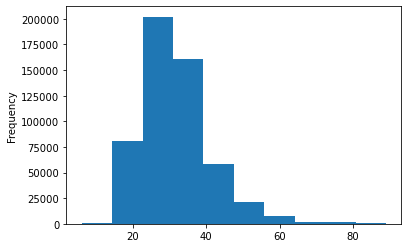

In [70]:
#raw_df = pd.read_csv('cap_df_states.csv')

#df1 = raw_df.groupby('age')['device_id'].nunique().sort_values(ascending=False).reset_index(name='count')
#df1.head(10)
df2 = raw_df.drop_duplicates(subset=None, keep='first', inplace=False)
df2['age'].plot(kind='hist')
#df1 = raw_df.groupby(['age'])['device_id'].nunique().sum()
#df1.head(100)
#df1['device_id'].plot(kind='hist')


#df = raw_df.groupby(['age', 'name'])['device_id'].nunique().sum()

#df['ext price'].plot(kind='hist')


In [78]:
#df2['quantile_ex_1'] = pd.qcut(df2['age'], q=5)
#df2['quantile_ex_2'] = pd.qcut(df2['age'], q=7, precision=0)

#df2.head()

#df1 = pd.read_csv('cap_df_states.csv')
#dfuniqdata = df1.drop_duplicates(subset=None, keep='first', inplace=False)
#dfuniqdata.head()
dfuniqdata =df2

dfuniqdata['age'].describe()




count    534462.000000
mean         31.331554
std           9.375614
min           6.000000
25%          25.000000
50%          30.000000
75%          35.000000
max          89.000000
Name: age, dtype: float64

age_bins
(5, 10]         38
(10, 16]      2605
(16, 20]     35581
(20, 25]    108296
(25, 30]    136330
(30, 35]    123662
(35, 40]     43100
(40, 45]     44781
(45, 50]     18927
(50, 60]     12589
(60, 80]      8158
(80, 90]       395
Name: age_bins, dtype: int64


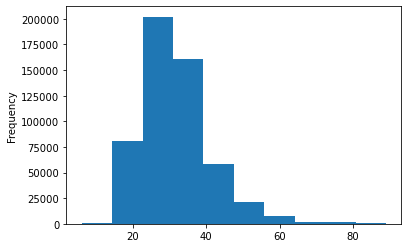

In [85]:
bins = [5,10,16, 20, 25, 30, 35,40,45, 50,60, 80,90]
dfuniqdata['age_bins'] = pd.cut(dfuniqdata['age'], bins)
dfuniqdata['age'].plot(kind='hist')
#dfuniqdata.info()
#df1.info()
df3 = dfuniqdata.groupby(['age_bins'])['age_bins'].count()
print (df3)

In [21]:
df_states=pd.to_csv('cap_df_states.csv', encoding='utf-8')
df_st=df_states
#rp_df = df_states.groupby('state').agg({'device_id': ['nunique']}).sort_values(2)
#rp_df.head(10)

df = df_states.groupby('state')['device_id'].nunique().sort_values(ascending=False).reset_index(name='count')
df.head(10)




#delaymonthlytrips1.head(1000)
#dfag =df_states.groupby(['state'],as_index=False)['device_id'].nunique().count()
#dfag=merged1.query('event_id== "84111"')
#columns = ['state']
#dfg = df_states[columns].groupby(df_states['device_id']).nunique()
#rp_df = df_states.groupby('state').agg({'device_id': ['nunique'],
#                                      'device_id': [ 'count']})



AttributeError: module 'pandas' has no attribute 'to_csv'

In [60]:
df = df_states.groupby(['state','gender'])['device_id'].nunique().sort_values(ascending=False).reset_index(name='count')
df.head(10)

,state,gender,count
0,TamilNadu,M,3605
1,UttarPradesh,M,2305
2,TamilNadu,F,2165
3,UttarPradesh,F,1355
4,Manipur,M,21
5,ArunachalPradesh,M,21
6,Chandigarh,M,20
7,Tripura,M,18
8,Tripura,F,18
9,Chandigarh,F,15


In [64]:
df = df_states.groupby(['brand'])['device_id'].nunique().sort_values(ascending=False).reset_index(name='count')
df.head(10)

,brand,count
0,Xiaomi,2409
1,Samsung,2139
2,Huawei,1506
3,vivo,883
4,OPPO,690
5,Meizu,590
6,Coolpad,474
7,HTC,148
8,联想,112
9,LeEco,84


In [46]:
pd.set_option('display.max_rows', 500)
df = df_states.groupby(['group'])['device_id'].nunique().sort_values(ascending=False).reset_index(name='count')
df.head(20)



NameError: name 'df_states' is not defined

In [ ]:
#dtype_dic= { 'device_id':str}
#df = pd.read_csv('cap_df_states.csv',dtype_dic)

In [56]:
#dtype_dic= { 'device_id':str}
df = pd.read_csv('cap_df_states.csv')


In [58]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534462 entries, 0 to 534461
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   event_id      534462 non-null  int64  
 1   device_id     534462 non-null  float64
 2   timestamp     534462 non-null  object 
 3   longitude     534462 non-null  float64
 4   latitude      534462 non-null  float64
 5   city          534462 non-null  object 
 6   state         534462 non-null  object 
 7   latlong       534462 non-null  object 
 8   gender        534462 non-null  object 
 9   age           534462 non-null  int64  
 10  group         534462 non-null  object 
 11  phone_brand   534462 non-null  object 
 12  device_model  534462 non-null  object 
 13  brand         534462 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 57.1+ MB


In [3]:
raw_df1 = pd.read_csv('cap_df_states.csv')
raw_df1.head()

,Unnamed: 0,event_id,device_id,timestamp,longitude,latitude,city,state,latlong,gender,age,group,phone_brand,device_model,brand
0,97304,3186309,7662139143719919126,2016-05-05 21:00:34,80.309272,13.149176,Chennai,TamilNadu,nannan,M,20,M22-,酷派,大神F1,Coolpad
1,278424,2036368,7662139143719919126,2016-05-06 22:17:54,80.309272,13.149176,Chennai,TamilNadu,nannan,M,20,M22-,酷派,大神F1,Coolpad
2,526041,236974,7662139143719919126,2016-05-07 21:20:51,80.309272,13.149176,Chennai,TamilNadu,nannan,M,20,M22-,酷派,大神F1,Coolpad
3,526624,981220,7662139143719919126,2016-05-04 08:39:45,80.309272,13.149176,Chennai,TamilNadu,nannan,M,20,M22-,酷派,大神F1,Coolpad
4,546361,2365158,7662139143719919126,2016-05-06 12:22:48,80.309272,13.149176,Chennai,TamilNadu,nannan,M,20,M22-,酷派,大神F1,Coolpad


In [4]:
#dffilt_all = raw_df1[raw_df1['city']== 'Chennai']
#dffilt_all["latlong"] = dffilt_all["longitude"].astype(str) + dffilt_all["latitude"].astype(str)
raw_df1["longlat"] = raw_df1["longitude"].astype(str) + raw_df1["latitude"].astype(str)
#fillval1 = dffilt_all['latlong'].mode()[0]
#print(fillval1)
#80.35979613.128174
raw_df1
dfq = raw_df1.query("longitude=='69.2075' and latitude=='34.5553'")
print(dfq)
dfq = raw_df1.query("longitude=='55.2708' and latitude=='25.2048'")
print(dfq)
dfq = raw_df1.query("longitude=='12.5674' and latitude=='41.8719'")
print(dfq)

        Unnamed: 0  event_id            device_id            timestamp  \
3872         23096   2896853  7758074839281445168  2016-05-02 05:48:31   
178077     1081115   3203806  7758074839281445168  2016-05-01 21:16:33   
423236     2575755   3175643  7758074839281445168  2016-05-01 05:13:10   

        longitude  latitude     city      state         latlong gender  age  \
3872      69.2075   34.5553  Chennai  TamilNadu  69.207534.5553      M   31   
178077    69.2075   34.5553  Chennai  TamilNadu  69.207534.5553      M   31   
423236    69.2075   34.5553  Chennai  TamilNadu  69.207534.5553      M   31   

         group phone_brand device_model    brand         longlat  
3872    M29-31          三星    Galaxy S3  Samsung  69.207534.5553  
178077  M29-31          三星    Galaxy S3  Samsung  69.207534.5553  
423236  M29-31          三星    Galaxy S3  Samsung  69.207534.5553  
        Unnamed: 0  event_id           device_id            timestamp  \
87672       534109    548055  348551303690779

In [5]:
#df1=raw_df1.loc[raw_df1['longlat'] =='69.207534.5553']
raw_df1.loc[raw_df1['longlat'] =='69.207534.5553', "longitude"] = "13.128174"
raw_df1.loc[raw_df1['longlat'] =='69.207534.5553', "latitude"] = "80.359796"
#df1=raw_df1.loc[raw_df1['longlat'] =='55.270825.2048']
raw_df1.loc[raw_df1['longlat'] =='55.270825.2048', "longitude"] = "13.128174"
raw_df1.loc[raw_df1['longlat'] =='55.270825.2048', "latitude"] = "80.359796"
#df1=raw_df1.loc[raw_df1['longlat'] =='12.567441.8719']
raw_df1.loc[raw_df1['longlat'] =='12.567441.8719', "longitude"] = "13.128174"
raw_df1.loc[raw_df1['longlat'] =='12.567441.8719', "latitude"] = "80.359796"


In [7]:
dfq = raw_df1.query("longitude=='69.2075' and latitude=='34.5553'")
print(dfq)
dfq = raw_df1.query("longitude=='55.2708' and latitude=='25.2048'")
print(dfq)
dfq = raw_df1.query("longitude=='12.5674' and latitude=='41.8719'")
print(dfq)
raw_df1.head()

raw_df1.to_csv('cap_df_final.csv', encoding='utf-8')

Empty DataFrame
Columns: [Unnamed: 0, event_id, device_id, timestamp, longitude, latitude, city, state, latlong, gender, age, group, phone_brand, device_model, brand, longlat]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, event_id, device_id, timestamp, longitude, latitude, city, state, latlong, gender, age, group, phone_brand, device_model, brand, longlat]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, event_id, device_id, timestamp, longitude, latitude, city, state, latlong, gender, age, group, phone_brand, device_model, brand, longlat]
Index: []


In [ ]:
df_final_upload =raw_df1
dffinal = df_final_upload.drop(columns=['city', 'latlong','gender','age','group','phone_brand','device_model','brand'])
dffinal = dffinal.drop(columns=['longlat'])
dffinal = dffinal.drop(columns=['Unnamed: 0'])


dffinal.set_index('event_id')
dffinal = dffinal.reset_index(drop=True)
dffinal.head()



dffinal.to_csv('cap_df_latlon.csv', encoding='utf-8')


raw_df2 = pd.read_csv('cap_df_latlon.csv')

raw_df2.head()